# Question 1

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Fetch the webpage
url = 'https://en.wikipedia.org/wiki/List_of_presidents_of_the_United_States'
response = requests.get(url)

In [3]:
if response.status_code == 200:
    # Parse the page content
    soup = BeautifulSoup(response.content, 'html.parser')

In [4]:
    # Find the table with the presidents' data
table = soup.find('table', {'class': 'wikitable'})

In [5]:
rows = table.find_all('tr')

In [8]:
def clean(string: str) -> str:
        return (" ".join(str(string).split())).encode(encoding="utf-8").decode()


def getMultipleValues(row):
        res = []
        if len(row.contents) > 2:
            for tag in row.find_all(["a", "p"], recursive=False):
                if tag.text is not None and str(tag.name) == "sup":
                    continue
                if tag.name == "p":
                    string = clean(tag.contents[0].text)
                    if "Vacant" not in string:
                        res += [string]
                    else:
                        res +=[pd.NA]
                elif tag.name == "a":
                    res += [clean(tag.text)]
        elif row.contents[0].string is not None:
            string = clean(row.contents[0].text)
            if string != "–" and "Vacant" not in string:
                res += [string]
            else:
                res += [pd.NA]
        elif row.contents[0].name == "a":
            res += [clean(row.contents[0].text)]
        else:
            res += [pd.NA]
        return res

prez_data = []
for row in rows[1:]:
    cols =[]
    cells = row.find_all("td")
    cells.pop(3)
    
    name = cells[1].b.a.string
    birthdeath = str(cells[1].span.string).replace("(","").replace(")","").split("–")
    if birthdeath[0] == "None":
        birthdeath = [cells[1].span.contents[2].replace(")","")]
    birth = int(birthdeath[0].strip())
    if len(birthdeath) >1:
        death = int(birthdeath[1].strip())
    else:
        death = np.nan
        
    terms = []
    for i in cells[2].find_all("span"):
        if i.string is None:
            text = i.contents[0]
        else:
            text = i.string
        terms.append(datetime.strptime(text, "%B %d, %Y"))
    if len(terms) < 2:
        terms += [pd.NA]
    
    parties = getMultipleValues(cells[3])
    if len(parties) < 2:
        for j in range(2 -len(parties)):
            parties += [pd.NA]
            
    elections = getMultipleValues(cells[4])
    if len(elections) < 4:
        for j in range(4 -len(elections)):
            elections += [pd.NA]
            
    vices = getMultipleValues(cells[5])
    if len(vices) < 2:
        for j in range(3 -len(vices)):
            vices += [pd.NA]
    
    prez_data.append([name, birth, death, *terms, *parties,  *elections, *vices])

In [9]:
dx  = pd.DataFrame(prez_data,columns = ['Name','Birth','Death', 'Start Term','End Term','Party One', 'Party Two','Election One', 'Election Two', 'Election Three', 'Election Four','Vice President One', 'Vice President Two', 'Vice President Three', 'Vice President Four']) #change to dataframe

In [10]:
dx.drop(columns=['Vice President Four'], inplace=True)

In [11]:
dx

,Name,Birth,Death,Start Term,End Term,Party One,Party Two,Election One,Election Two,Election Three,Election Four,Vice President One,Vice President Two,Vice President Three
0,George Washington,1732,1799.0,1789-04-30,1797-03-04 00:00:00,Unaffiliated,<NA>,1788–1789,1792,<NA>,<NA>,John Adams,<NA>,<NA>
1,John Adams,1735,1826.0,1797-03-04,1801-03-04 00:00:00,Federalist,<NA>,1796,<NA>,<NA>,<NA>,Thomas Jefferson,<NA>,<NA>
2,Thomas Jefferson,1743,1826.0,1801-03-04,1809-03-04 00:00:00,Democratic-Republican,<NA>,1800,1804,<NA>,<NA>,Aaron Burr,George Clinton,None
3,James Madison,1751,1836.0,1809-03-04,1817-03-04 00:00:00,Democratic-Republican,<NA>,1808,1812,<NA>,<NA>,George Clinton,<NA>,Elbridge Gerry
4,James Monroe,1758,1831.0,1817-03-04,1825-03-04 00:00:00,Democratic-Republican,<NA>,1816,1820,<NA>,<NA>,Daniel D. Tompkins,<NA>,<NA>
5,John Quincy Adams,1767,1848.0,1825-03-04,1829-03-04 00:00:00,Democratic-Republican,National Republican,1824,<NA>,<NA>,<NA>,John C. Calhoun,<NA>,<NA>
6,Andrew Jackson,1767,1845.0,1829-03-04,1837-03-04 00:00:00,Democratic,<NA>,1828,1832,<NA>,<NA>,John C. Calhoun,<NA>,Martin Van Buren
7,Martin Van Buren,1782,1862.0,1837-03-04,1841-03-04 00:00:00,Democratic,<NA>,1836,<NA>,<NA>,<NA>,Richard Mentor Johnson,<NA>,<NA>
8,William Henry Harrison,1773,1841.0,1841-03-04,1841-04-04 00:00:00,Whig,<NA>,1840,<NA>,<NA>,<NA>,John Tyler,<NA>,<NA>
9,John Tyler,1790,1862.0,1841-04-04,1845-03-04 00:00:00,Whig,Unaffiliated,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


# Question 2

In [12]:
dx_copy = dx.drop_duplicates(subset=["Name"])
print('There are '+str(len(dx_copy)) + ' presidents on the web page.')

There are 45 presidents on the web page.


# Question 3

In [13]:
print( str(len(dx)) + ' presidencies have existed in the United states.')

46 presidencies have existed in the United states.


# Question 4

In [14]:
#Filter presidents who served more than one term
multiple_terms = dx[dx['Election Two'].notna()]


#Filter presidents who had only one vice president
one_vp = multiple_terms[multiple_terms.apply(lambda row: len(set([row['Vice President One'], row['Vice President Two'], row['Vice President Three']])) == 2, axis=1)]
print('The presidents who served more than one term and had only one vice president for the whole duration of their presidency:\n')

#Then List the presidents
for index, row in one_vp.iterrows():
    print(f"- President {row['Name']} with Vice President {row['Vice President One']}")

The presidents who served more than one term and had only one vice president for the whole duration of their presidency:

- President George Washington with Vice President John Adams
- President James Monroe with Vice President Daniel D. Tompkins
- President Woodrow Wilson with Vice President Thomas R. Marshall
- President Dwight D. Eisenhower with Vice President Richard Nixon
- President Ronald Reagan with Vice President George H. W. Bush
- President Bill Clinton with Vice President Al Gore
- President George W. Bush with Vice President Dick Cheney
- President Barack Obama with Vice President Joe Biden


# Question 5

In [15]:
# Converting Start Term and End Term to datetime
dx['Start Term'] = pd.to_datetime(dx['Start Term'])
dx['End Term'] = pd.to_datetime(dx['End Term'])

# Calculate the duration in office
dx['Duration'] = dx['End Term'] - dx['Start Term']

# Find the president with the longest duration
longest_serving_president = dx.loc[dx['Duration'].idxmax()]

# Extract the required information
president_name = longest_serving_president['Name']
start_term = longest_serving_president['Start Term']
duration = longest_serving_president['Duration']

# Convert duration from days to terms (approx. 1 term = 4 years)
terms = duration.days / (365.25 * 4)

print(f"President {president_name} was in office longer than others. He got in office on {start_term.date()} and served for approximately {terms:.2f} terms.")

President Franklin D. Roosevelt was in office longer than others. He got in office on 1933-03-04 and served for approximately 3.03 terms.


#  Question 6

In [16]:
# Get the vice presidents' names
vice_presidents = pd.concat([dx['Vice President One'], dx['Vice President Two'], dx['Vice President Three']]).dropna().unique()

# Find presidents who were previously vice presidents and were elected
elected_presidents_after_vp = dx[(dx['Name'].isin(vice_presidents)) & (dx['Election One'].notna())]

# Extract the required information
elected_presidents_after_vp = elected_presidents_after_vp[['Name', 'Start Term', 'End Term', 'Vice President One', 'Vice President Two', 'Vice President Three']]

# Print the results
for index, row in elected_presidents_after_vp.iterrows():
    vp_name = row['Name']
    vp_terms = []
    if pd.notna(row['Vice President One']) and row['Vice President One'] == vp_name:
        vp_terms.append(f"Vice President Term: {row['Start Term']} to {row['End Term']}")
    if pd.notna(row['Vice President Two']) and row['Vice President Two'] == vp_name:
        vp_terms.append(f"Vice President Term: {row['Start Term']} to {row['End Term']}")
    if pd.notna(row['Vice President Three']) and row['Vice President Three'] == vp_name:
        vp_terms.append(f"Vice President Term: {row['Start Term']} to {row['End Term']}")
    
    print(f"- President {row['Name']} was previously a vice president. Terms as Vice President: {'; '.join(vp_terms)}. Presidential Term: {row['Start Term']} to {row['End Term']}")

- President John Adams was previously a vice president. Terms as Vice President: . Presidential Term: 1797-03-04 00:00:00 to 1801-03-04 00:00:00
- President Thomas Jefferson was previously a vice president. Terms as Vice President: . Presidential Term: 1801-03-04 00:00:00 to 1809-03-04 00:00:00
- President Martin Van Buren was previously a vice president. Terms as Vice President: . Presidential Term: 1837-03-04 00:00:00 to 1841-03-04 00:00:00
- President Theodore Roosevelt was previously a vice president. Terms as Vice President: . Presidential Term: 1901-09-14 00:00:00 to 1909-03-04 00:00:00
- President Calvin Coolidge was previously a vice president. Terms as Vice President: . Presidential Term: 1923-08-02 00:00:00 to 1929-03-04 00:00:00
- President Harry S. Truman was previously a vice president. Terms as Vice President: . Presidential Term: 1945-04-12 00:00:00 to 1953-01-20 00:00:00
- President Lyndon B. Johnson was previously a vice president. Terms as Vice President: . Presidenti

# Question 7

In [17]:
# Filter presidents who were never elected
never_elected = dx[dx['Election One'].isna()]

# Get the names of these presidents
never_elected_names = never_elected['Name'].tolist()

# Count the number of presidents who were never elected
never_elected_count = len(never_elected_names)

print(f"There are {never_elected_count} presidents who were never elected. Their names are: {', '.join(never_elected_names)}.")

There are 5 presidents who were never elected. Their names are: John Tyler, Millard Fillmore, Andrew Johnson, Chester A. Arthur, Gerald Ford.


# Question 8

In [18]:
# Split the 'Name' column into 'Forename' and 'Surname'
dx['Forename'] = dx['Name'].apply(lambda x: x.split()[0])
dx['Surname'] = dx['Name'].apply(lambda x: x.split()[-1])

# Find duplicates in forenames
forename_duplicates = dx[dx.duplicated(subset='Forename', keep=False)].sort_values(by='Forename')

# Find duplicates in surnames
surname_duplicates = dx[dx.duplicated(subset='Surname', keep=False)].sort_values(by='Surname')

# Print results
print("Presidents with the same forenames:")
for index, row in forename_duplicates.iterrows():
    print(f"President {row['Name']} served from {row['Start Term']} to {row['End Term']}.")

print("\nPresidents with the same surnames:")
for index, row in surname_duplicates.iterrows():
    print(f"President {row['Name']} served from {row['Start Term']} to {row['End Term']}.")

Presidents with the same forenames:
President Andrew Johnson served from 1865-04-15 00:00:00 to 1869-03-04 00:00:00.
President Andrew Jackson served from 1829-03-04 00:00:00 to 1837-03-04 00:00:00.
President Franklin D. Roosevelt served from 1933-03-04 00:00:00 to 1945-04-12 00:00:00.
President Franklin Pierce served from 1853-03-04 00:00:00 to 1857-03-04 00:00:00.
President George Washington served from 1789-04-30 00:00:00 to 1797-03-04 00:00:00.
President George H. W. Bush served from 1989-01-20 00:00:00 to 1993-01-20 00:00:00.
President George W. Bush served from 2001-01-20 00:00:00 to 2009-01-20 00:00:00.
President Grover Cleveland served from 1885-03-04 00:00:00 to 1889-03-04 00:00:00.
President Grover Cleveland served from 1893-03-04 00:00:00 to 1897-03-04 00:00:00.
President James K. Polk served from 1845-03-04 00:00:00 to 1849-03-04 00:00:00.
President James Monroe served from 1817-03-04 00:00:00 to 1825-03-04 00:00:00.
President James Madison served from 1809-03-04 00:00:00 to

# Question 9

In [19]:
# Calculate the age at the start of the term
dx['Age at Start'] = dx['Start Term'].dt.year - dx['Birth']


# Find the president with the highest age at the start of their term
oldest_president = dx.loc[dx['Age at Start'].idxmax()]

# Get the required information
president_name = oldest_president['Name']
start_term = oldest_president['Start Term'].year
end_term = oldest_president['End Term'].year if pd.notna(oldest_president['End Term']) else "present"
duration_days = (oldest_president['End Term'] - oldest_president['Start Term']).days if pd.notna(oldest_president['End Term']) else "ongoing"
duration_years = duration_days // 365 if isinstance(duration_days, int) else "ongoing"

print(f"The oldest president ever elected for office is {president_name} (79 years). He got in office in {start_term} and ended his tenure in {end_term}. The duration of his presidency was {duration_years} years.")

The oldest president ever elected for office is Joe Biden (79 years). He got in office in 2021 and ended his tenure in present. The duration of his presidency was ongoing years.


# Question 10

In [20]:
youngest_president = dx.loc[dx['Age at Start'].idxmin()]

# Extract the required information
ypresident_name = youngest_president['Name']
ystart_term = youngest_president['Start Term'].year
yend_term = youngest_president['End Term'].year if pd.notna(youngest_president['End Term']) else "present"
yduration_days = (youngest_president['End Term'] - youngest_president['Start Term']).days if pd.notna(oldest_president['End Term']) else "ongoing"
yduration_years = duration_days // 365 if isinstance(duration_days, int) else "ongoing"

print(f"The youngest president ever elected for office is {ypresident_name} (43 years). He got in office in {ystart_term} and ended his tenure in {yend_term}. The duration of his presidency was {yduration_years} years.")

The youngest president ever elected for office is Theodore Roosevelt (43 years). He got in office in 1901 and ended his tenure in 1909. The duration of his presidency was ongoing years.


# Question 11

In [21]:
#Calculate the duration each president lived after leaving office until their death or until now
current_year = datetime.now().year
dx['Death Year'] = dx['Death'].fillna(current_year)
dx['Duration After Office'] = dx['Death Year'] - dx['End Term'].dt.year

#Find the president with the longest duration after leaving office
longest_lived_president = dx.loc[dx['Duration After Office'].idxmax()]

#Get the required information
president_name = longest_lived_president['Name']
end_term = longest_lived_president['End Term'].year
duration_after_office = longest_lived_president['Duration After Office']
death_year = longest_lived_president['Death Year']

print(f"The president who lived the longest after leaving office is {president_name}. He left office in {end_term} and has lived for {duration_after_office} years after leaving office. He is still alive as at {death_year}.")

The president who lived the longest after leaving office is Jimmy Carter. He left office in 1981 and has lived for 43.0 years after leaving office. He is still alive as at 2024.0.


# Question 12

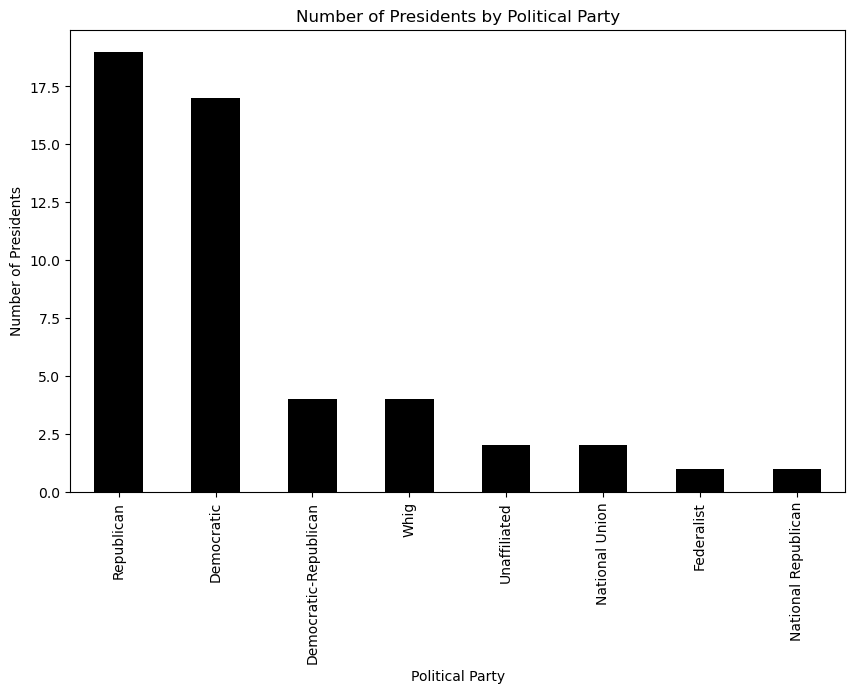

The party with the most elected presidents is Republican with 19 presidents.


In [22]:
party_counts = pd.concat([dx['Party One'], dx['Party Two']]).value_counts()

#Plotting the bar chart
plt.figure(figsize=(10, 6))
party_counts.plot(kind='bar')
party_counts.plot(kind='bar', color='black')
plt.title('Number of Presidents by Political Party')
plt.xlabel('Political Party')
plt.ylabel('Number of Presidents')
plt.xticks(rotation=90)
plt.show()

#find the party with the most elected presidents
most_elected_party = party_counts.idxmax()
most_elected_count = party_counts.max()

print(f"The party with the most elected presidents is {most_elected_party} with {most_elected_count} presidents.")